<a href="https://colab.research.google.com/github/Orlandovpjunior/Orlandovpjunior/blob/main/TC07_Exerc%C3%ADcios_Workspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Instalação
!apt install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
!pip install automata-lib[visual]
!git clone https://github.com/TC-UFCG/TCUtil.git
from TCUtil.util import validate_string, print_rastreamento, convert_to_dfa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 45 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,670 kB of addit

# Exercícios

## (01)

Construa um DFA que reconhece a linguagem descrita por sequencias de uma ou mais ocorrências da cadeia $ab$, onde $\Sigma = \{a,b\}$.

Apresente também a expressão regular que descreve esta linguagem.

(a|b)*


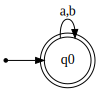

In [ ]:
from automata.fa.dfa import DFA
from automata.fa.gnfa import GNFA

# Defina o DFA aqui
dfa01 = DFA(
        states={'q0'},
        input_symbols={'b', 'a'},
        transitions={
            'q0': {'a': 'q0', 'b': 'q0'},
        },
        initial_state='q0',
        final_states={'q0'}
)

# Gerando a expressão regular
gnfa1 = GNFA.from_dfa(dfa01)
print(gnfa1.to_regex())

dfa01.show_diagram()

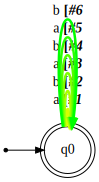

In [ ]:
# Simulação
cadeia = 'ababab'
dfa01.show_diagram(cadeia)

## (02)

Construa um NFA que reconhece a linguagem sobre $\Sigma = \{0,1\}$, onde as cadeias são sequencias de $0$'s seguidas por sequencias de $1$'s ou sequências de $1$'s seguidas por sequencias de $0$'s.

São exemplos de cadeias aceitas: $00, 11, 100, 00111, ...$

Apresente também a expressão regular que define esta linguagem.

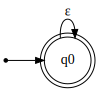

In [ ]:
## cadeia comeca com sequencia de 0s seguida por sequencia de 1s ou vice-versa
from automata.fa.nfa import NFA
from automata.fa.gnfa import GNFA

# Defina o NFA aqui
nfa01 = NFA(
        states={'q0'},
        input_symbols={'0', '1'},
        transitions={
            'q0': {'' : {'q0'}},
        },
        initial_state='q0',
        final_states={'q0'}
)

# Gere e imprima a expressão regular aqui

nfa01.show_diagram()

Rastreamento de todos os estados alcançados:
δ({'q0'},0) -> set()
δ(set(),0) -> set()
δ(set(),1) -> set()
δ(set(),1) -> set()
δ(set(),1) -> set()
δ(set(),0) -> set()



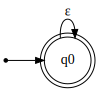

In [ ]:
cadeia='001110'
gen = nfa01.read_input_stepwise(cadeia)
print_rastreamento(gen,nfa01,cadeia)
nfa01.show_diagram(cadeia)

## (3)

Construa um DFA que implementa o controlador de portas apresentado na Aula 03. Para deixa-lo mais interessante, considere a existência de mais um símbolo de entrada que represente um evento de erro do sensor de detecção de presença e um estado para o qual o automato deve ir após receber o evento associado a este símbolo.

Devido a limitações de automata-lib, os símbolos de entrada devem ser representados por um único caracter. Assim considere que as entradas frente, trás, nenhuma, ambas e erro são representadas pelos caracteres `f`, `t`, `n`, `a` e `e` respectivamente. Adicione os estados `fechada` e `aberta` ao conjunto de estados finais.

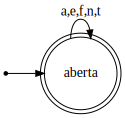

In [ ]:
from automata.fa.dfa import DFA

# Defina o DFA aqui
dfa02 = DFA(
    states = {'aberta'},
    input_symbols = {'n','f','t','a','e'},
    transitions = {
        'aberta': {'n': 'aberta',
                   'f': 'aberta',
                   't': 'aberta',
                   'a': 'aberta',
                   'e' : 'aberta'},
    },
    initial_state = 'aberta',
    final_states = {'aberta', 'aberta'}
)

dfa02.show_diagram()

Ao final, a porta vai estar: aberta


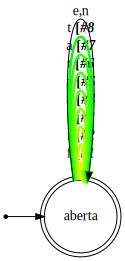

In [ ]:
cadeia3='fffaatat'
try:
  ultimo_estado = list(dfa02.read_input_stepwise(cadeia3))[-1]
except:
  ultimo_estado = ' em estado de erro'
print(f"Ao final, a porta vai estar: {ultimo_estado}")
dfa02.show_diagram(cadeia3)

##(04)

É possível testar se dois autômatos são equivalentes, isto é, se reconhecem uma mesma linguagem? Como isto poderia ser feito usando automata-lib?